In [0]:
#getting ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Facebook's Prophet forecasting library
from fbprophet import Prophet


#https://github.com/peter-stuart-turner/time-series-analyses-and-climate-change/blob/master/notebook/medium-post3_timeseries-analysis-and-climate-change.ipynb

In [0]:
#readind data set
url="https://raw.githubusercontent.com/peter-stuart-turner/time-series-analyses-and-climate-change/master/processed_data/global_surface_temperature_anomalies.csv"
df=pd.read_csv(url)

In [0]:
df.head()

,date,Avg_Anomaly_deg_C
0,1880-01-31,-0.29
1,1880-02-29,-0.18
2,1880-03-31,-0.11
3,1880-04-30,-0.19
4,1880-05-31,-0.11


In [0]:
#renaming column
df.rename(columns = {"Avg_Anomaly_deg_C": "temp" },inplace=True) 

In [0]:
df.tail()

,date,temp
1675,2019-08-31,0.92
1676,2019-09-30,0.92
1677,2019-10-31,0.92
1678,2019-11-30,0.92
1679,2019-12-31,0.92


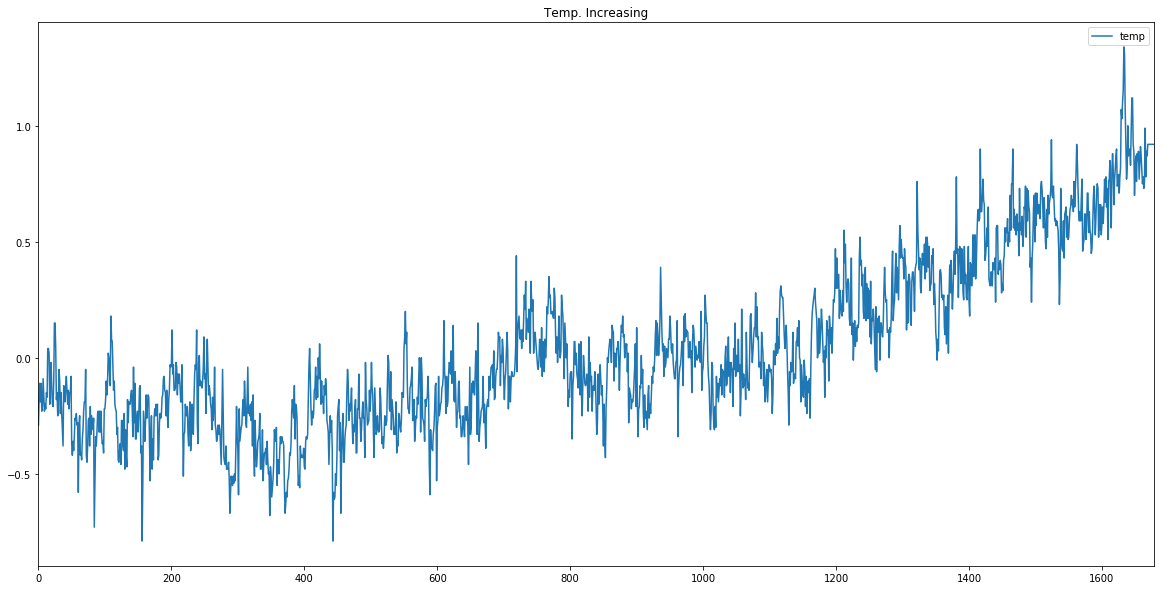

In [0]:
import matplotlib.pyplot as plt

df.plot(figsize=(20,10))
plt.title("Temp. Increasing")
plt.show()

In [0]:
#configuring the model
t_prophet = pd.DataFrame()
t_prophet['ds'] = df.date
t_prophet['y'] = df.temp

In [0]:
#fitting model
m = Prophet(weekly_seasonality=False,interval_width=.80) # Deactiving by default weekly seasonality seasonality_mode='multiplicative'
m.add_seasonality(name='monthly', period=30.5, fourier_order=5) # Adding monthly seasonality 
m.fit(t_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
#forecasting the future
future = m.make_future_dataframe(freq='M', periods=10*12)
future['cap'] = 1 # setting a maximum range in plotting
forecast = m.predict(future)


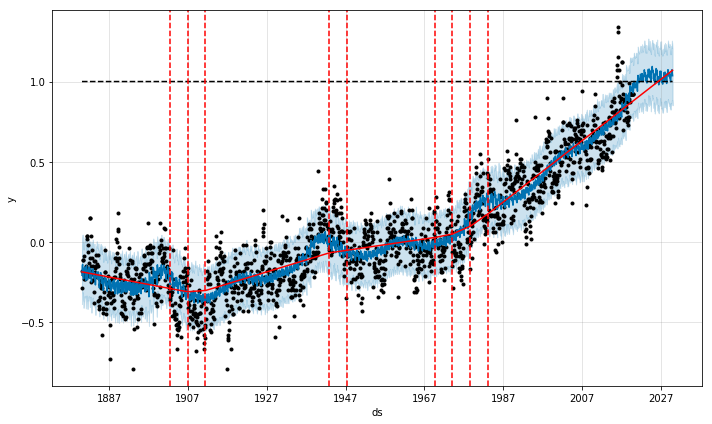

In [0]:

#Including Change point
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

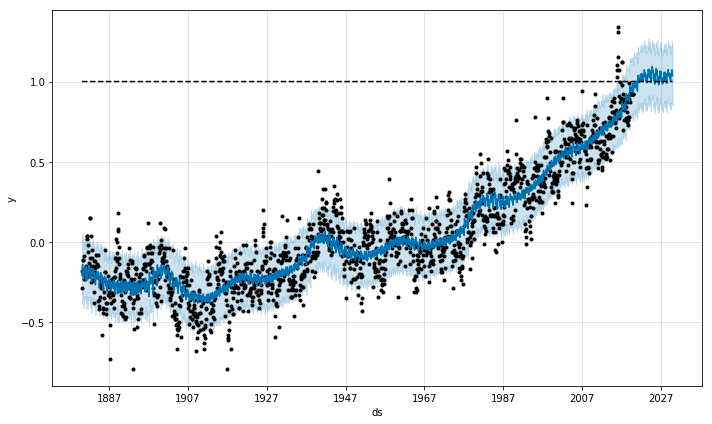

In [0]:
#Plotting the future
m.plot(forecast);

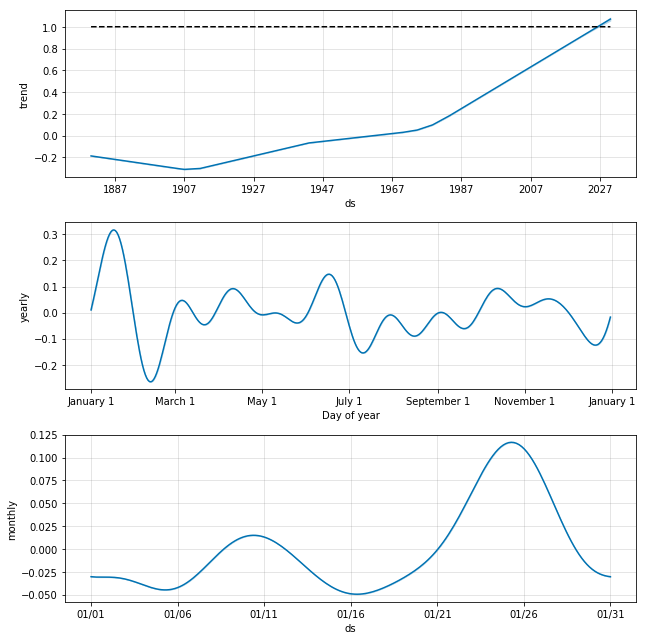

In [0]:
#Plotting time series components
m.plot_components(forecast);

In [0]:
cross_validation(m, horizon, units, period = NULL, initial = NULL)

NameError: ignored